In [ ]:
from google.colab import drive
import pandas as pd 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading dataset
%cd /content/drive/My Drive/PROJECT/

df=pd.read_csv("diabetes.csv")


/content/drive/My Drive/PROJECT


In [ ]:
model_array = []
model_accuracy = []

In [ ]:
#feature variables
x=df.drop(['Outcome'], axis=1)
y=df.Outcome

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import tree

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
   
clf.predict(x_test)
score = clf.score(x_test, y_test)
print("Accuracy of model is: %.4f" %(score*100))

Accuracy of model is: 67.5325


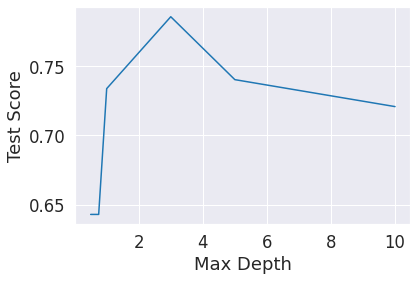

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

max_depths = [0.5,0.75,1,3,5,10]
results = []
test_results = []
for max_depth in max_depths:
   clf = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf = 2)
   clf.fit(x_train, y_train)
   
   clf.predict(x_test)
   score = clf.score(x_test, y_test)
   results.append(score)

plt.plot(max_depths, results, color ='tab:blue')
plt.xlabel("Max Depth")
plt.ylabel("Test Score")

plt.show()

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf = 2)
clf.fit(x_train, y_train)
   
clf.predict(x_test)
clf_score = clf.score(x_test, y_test)
print("Accuracy of model is: %.4f" %(clf_score*100))

Accuracy of model is: 78.5714


In [ ]:
features=x.columns

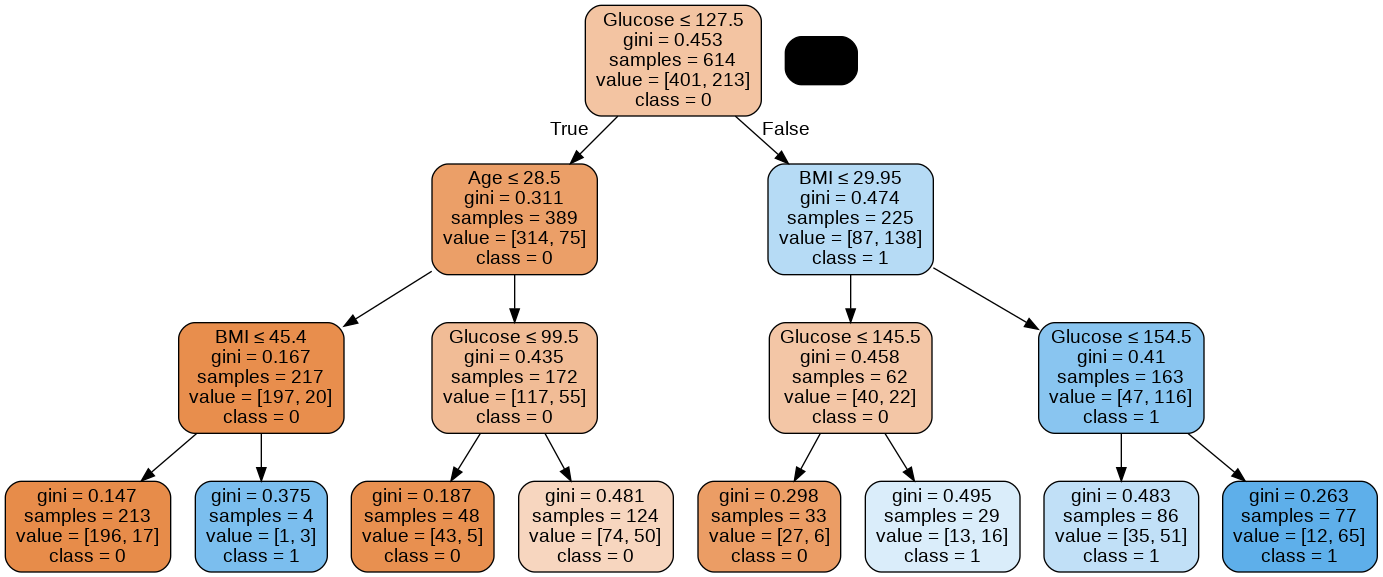

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())

In [ ]:
from sklearn import metrics
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 79.87012987012987


In [ ]:
model_accuracy.append(metrics.accuracy_score(y_test, y_pred)*100)
model_array.append('DecisionTreeClassifier')

The classification rate increased to 79.87%, which is better accuracy than the previous model.



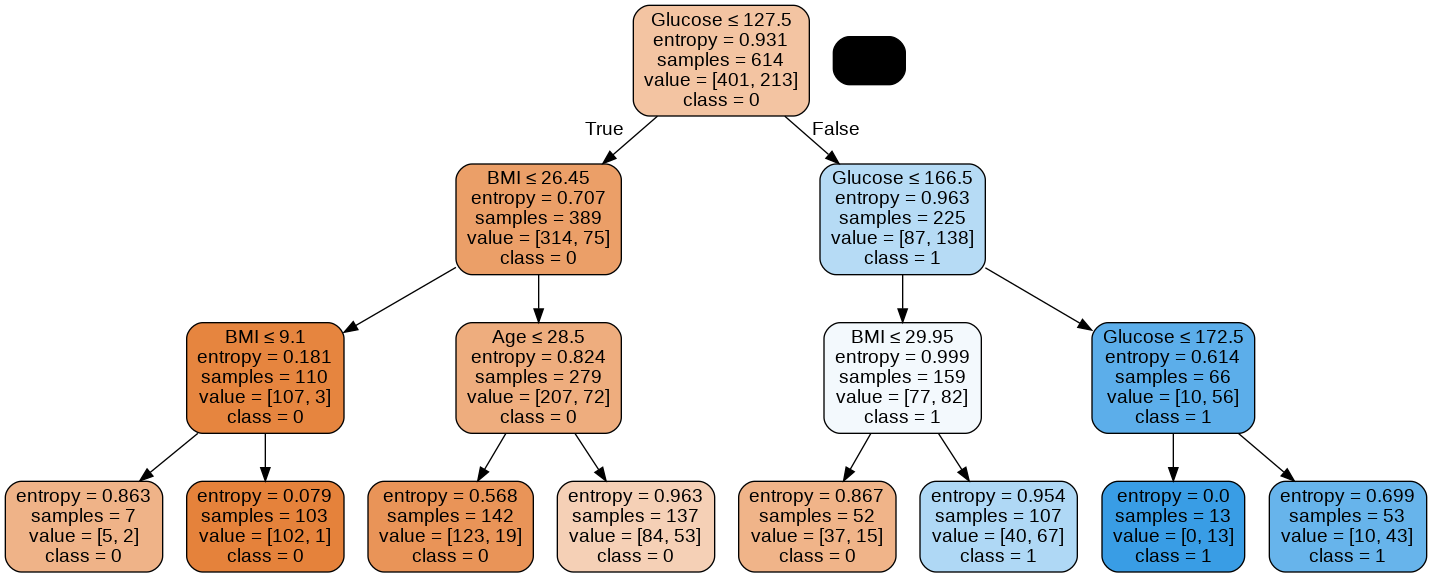

In [ ]:
#Better Decision Tree Visualisation
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())

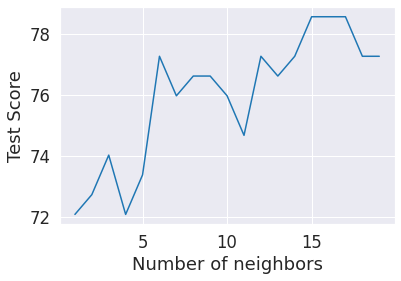

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
results = []

for i in range(1,20):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    score = knn.score(x_test,y_test)
    results.append(score*100)

plt.plot(range(1,20), results, color ='tab:blue')
plt.xlabel("Number of neighbors")
plt.ylabel("Test Score")

plt.show()

In [ ]:
# Model Accuracy
knn = KNeighborsClassifier(16)
knn.fit(x_train,y_train)
print("Accuracy:",knn.score(x_test, y_test)*100)

Accuracy: 78.57142857142857


In [ ]:
model_accuracy.append(knn.score(x_test, y_test)*100)
model_array.append('KNeighborsClassifier')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [ ]:
gmodel = GaussianNB()
gmodel.fit(x_train, y_train)
g_ypred = gmodel.predict(x_test)
gscore = metrics.confusion_matrix(y_test, g_ypred)
print(gscore)
print("Accuracy:",gmodel.score(x_test, y_test)*100)

[[85 14]
 [21 34]]
Accuracy: 77.27272727272727


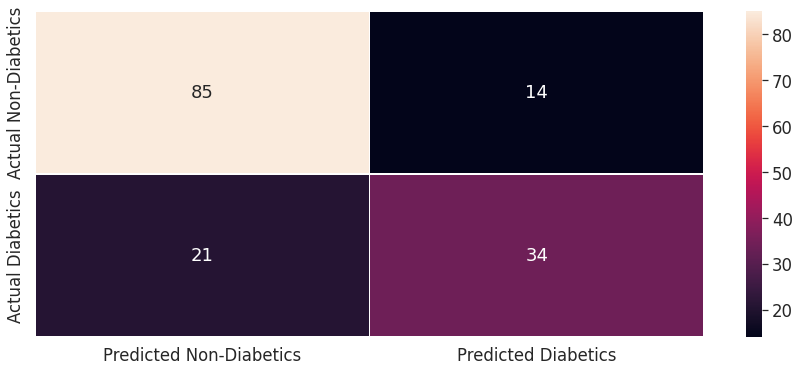

In [ ]:
import seaborn
ylabel = ["Actual Non-Diabetics","Actual Diabetics"]
xlabel = ["Predicted Non-Diabetics","Predicted Diabetics"]
plt.figure(figsize=(15,6))
seaborn.heatmap(gscore, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)

In [ ]:
model_accuracy.append(gmodel.score(x_test, y_test)*100)
model_array.append('GaussianNB')

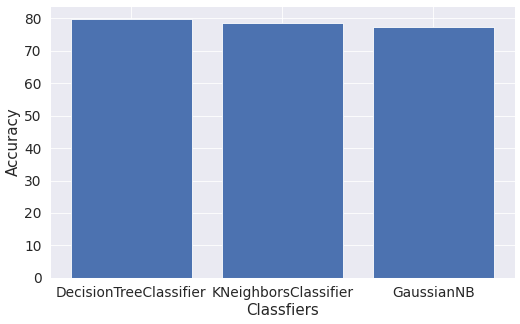

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=60)
plt.bar(model_array,model_accuracy)
plt.xlabel("Classfiers")
plt.ylabel("Accuracy")

plt.show()

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Importance')

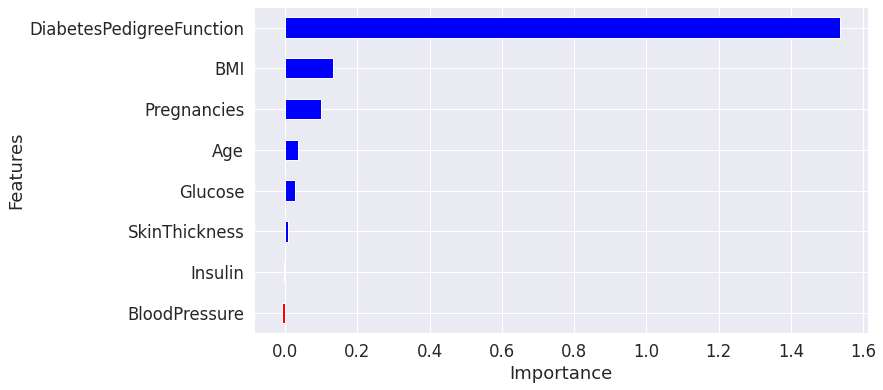

In [ ]:
coeff = list(lr_model.coef_[0])
values = pd.DataFrame()
labels = list(df.drop('Outcome',1).columns)

values['Features'] = labels
values['importance'] = coeff
values.sort_values(by=['importance'], ascending=True, inplace=True)
values['positive'] = features['importance'] > 0
values.set_index('Features', inplace=True)
values.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')